In [1]:
! git clone https://github.com/einstalek/DL-models-experiments.git

Cloning into 'DL-models-experiments'...
remote: Enumerating objects: 320, done.
remote: Counting objects: 100% (320/320), done.
remote: Compressing objects: 100% (228/228), done.
remote: Total 320 (delta 197), reused 201 (delta 89), pack-reused 0
Receiving objects: 100% (320/320), 4.08 MiB | 10.37 MiB/s, done.
Resolving deltas: 100% (197/197), done.


In [3]:
import sys
sys.path.append("./DL-models-experiments/")

In [4]:
from models.unet import Unet
from models.pix2pix import train, Discriminator
from datasets.paired_dataset import PairedDataset

In [7]:
import numpy as np 
import os
import torch
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train_data = PairedDataset("../input/facades-dataset/trainB/", "../input/facades-dataset/trainA/", split="train")
test_data = PairedDataset("../input/facades-dataset/trainB/", "../input/facades-dataset/trainA/", split="val")
train_loader = DataLoader(train_data, 16, drop_last=True, shuffle=True, num_workers=8)

In [18]:
gen = Unet(3, decoder_dropout=0.2)
disc = Discriminator()

In [20]:
train(gen, disc, train_loader, 5, "../working/")

  0%|          | 0/250 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
0249/0250, 10.00 epoch: 100%|██████████| 250/250 [04:14<00:00,  1.02s/it, train/disc_loss=0.344, train/gen_loss=4.52]


In [21]:
gen = Unet(3, decoder_dropout=0.2)
gen.load_state_dict(torch.load("../working/gen.pth")['state_dict'])
gen.eval();

In [22]:
data = PairedDataset("/kaggle/input/facades-dataset/testB/", "/kaggle/input/facades-dataset/testA/", split='test')

In [23]:
imgs = []
for i in range(6):
    img_a, img_b = data[i]
    fake_b = gen(img_a[None])
    imgs.append(img_a.detach().cpu().numpy().transpose(1, 2, 0))
    imgs.append(fake_b[0].detach().cpu().numpy().transpose(1, 2, 0))
    imgs.append(img_b.detach().cpu().numpy().transpose(1, 2, 0))

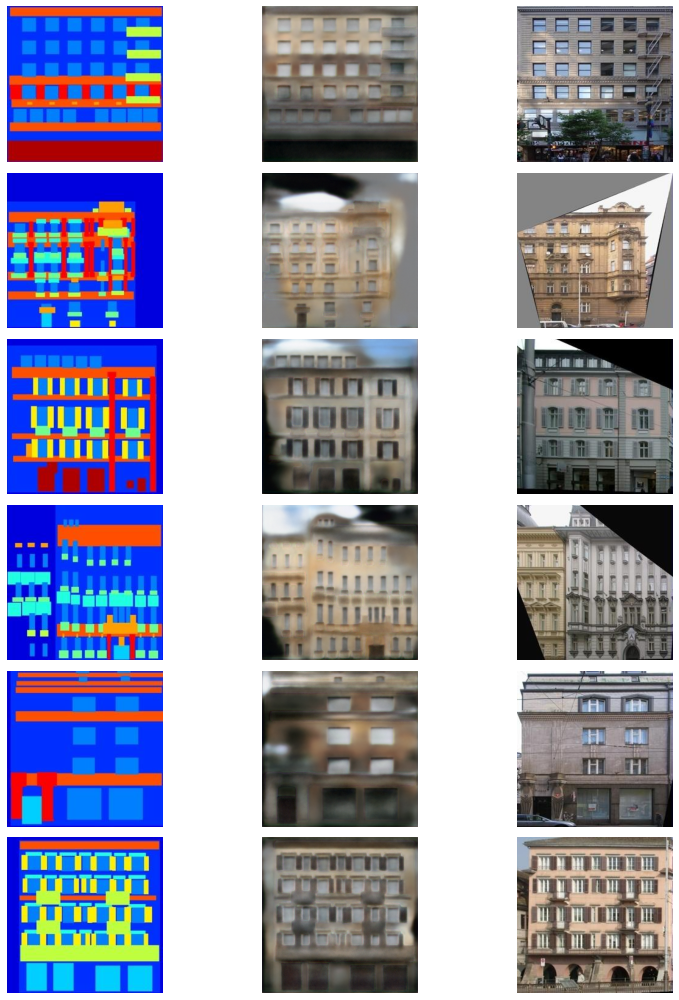

In [24]:
plt.figure(figsize=(12, 14))
for i in range(18):
    plt.subplot(6, 3, i+1)
    plt.imshow(0.5 + 0.5  * imgs[i][... , ::-1])
    plt.axis('off')
plt.tight_layout()